# Clustering analysis

## 1.Loading the essentical package

In [1]:
from pandas import Series,DataFrame
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

## 2. Import the dataset and obtain the preprocessed data

### 2.1 Get dataset fro a certain year
Data for 2020 is obtained firstly as example

In [2]:
df = pd.read_excel("all_submission_files.xlsx")
data = df[df["report_end_date"].dt.year == 2020]
data.head(n=6)

,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType
0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,70889608,211680,SH
1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,29886300,107698,SH
2,2020-09-30,1129770,Ishares Russell,COM,464287622,26825894,143339,SH
3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,21672909,78005,SH
4,2020-09-30,1129770,iShares Russell 20,COM,464287655,9434973,62988,SH
5,2020-09-30,1129770,SPDR S&P Mid-Cap 4,COM,78464a821,9351708,27600,SH


### 2.2 Summary dataset
Get the number of stocks and total amount of each company’s investment in stocks in 2020

In [3]:
data_summary = data.groupby('cik').agg({'value': ['sum', 'count']})
index_name = data_summary.index
total_value = []
number_stocks = []
for i in range(0, len(data_summary)):
  total_value.append(data_summary.values[i, 0])
  number_stocks.append(data_summary.values[i, 1])
data_final = {'cik':index_name,'number_stocks': number_stocks, 'total_value': total_value}
data_final = DataFrame(data_final)
data_final = data_final.drop(data_final[data_final['total_value']==0].index)
data_final.head(n=6)

,cik,number_stocks,total_value
0,732847,80,248377
1,750641,623,2192576
2,819535,86,777300
3,883790,168,639939
4,903944,79,2885946
5,911270,49,941165


### 2.3 Adjust the data scale
Log the data value of total_value and number_stocks

In [4]:
data_log = data_final.copy()
data_log['number_stocks'] = numpy.log(data_log['number_stocks'])
data_log['total_value'] = numpy.log(data_log['total_value'])
data_log.head(n=6)

,cik,number_stocks,total_value
0,732847,4.382027,12.422703
1,750641,6.434547,14.600588
2,819535,4.454347,13.563582
3,883790,5.123964,13.369128
4,903944,4.369448,14.875363
5,911270,3.891820,13.754874


## 3. Visualize the data

### 3.1 Plot the dataset (log) 

<Figure size 864x936 with 0 Axes>

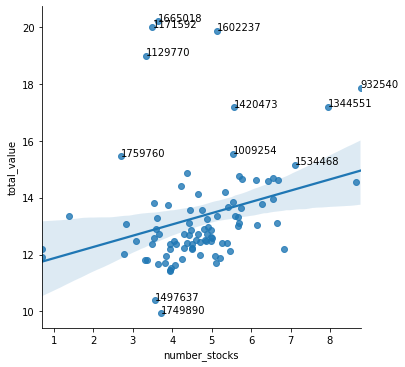

In [7]:
data_label= data_log[(data_log.total_value>15)|(data_log.total_value<11)]
fig=plt.figure(figsize=(12, 13))
sns.lmplot(x='number_stocks',y='total_value',data=data_log,fit_reg=True) 
for i in range (len(data_label)):
    plt.annotate(data_label['cik'].iloc[i],(data_label['number_stocks'].iloc[i],data_label['total_value'].iloc[i]))

### 3.2 Get the suitable number of clusters 

Text(0, 0.5, 'WCSS')

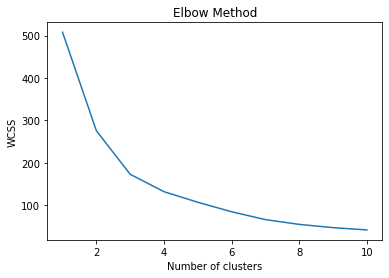

In [14]:
wcss = []
n=11
data_analysis = data_log.drop(columns="cik")
if len(data_analysis)<11:
    n=len(data_analysis)
for i in range(1, n):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_analysis)
    wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, n), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### 3.3 Clustering analysis (two component and 6 cluster)

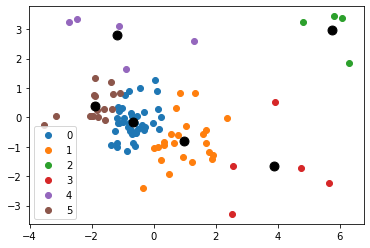

In [18]:
pca = PCA(2)
data_cluster = pca.fit_transform(data_analysis)
kmeans = KMeans(n_clusters=6)
label = kmeans.fit_predict(data_cluster)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
plt.figure()
for i in u_labels:
    plt.scatter(data_cluster[label == i, 0], data_cluster[label == i, 1], label=i)
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color="black")
plt.legend()


### 3.4 Obtain the cik of different clusters

In [155]:
def get_cik (label_n):
    label_list = pca.inverse_transform(data_cluster[label==label_n])
    cik = []
    for i in range(len(label_list)):
        cik.append(data_log[round(data_log['total_value'],5)==round(label_list[i][1],5)]['cik'].values[0])
    return cik

In [165]:
cik_all=[]
for i in u_labels:
    cik_all.append(get_cik(i))
len(cik_all)  

6

In [168]:
cik_all[3] # the all cik of culster 4

[932540, 1344551, 1420473, 1534270, 1534468]